In [3]:
import pandas as pd

import numpy as np 
import pandas as pd 
import tensorflow as tf
import keras
from keras import backend as K
from keras.layers import Layer
from keras.layers import Concatenate
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, TimeDistributed, LSTM, Embedding, Input
from keras import Model
import re
import string
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional


!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/fra.txt','r') as f:
  data = f.read()

In [5]:
uncleaned_data_list = data.split('\n')
len(uncleaned_data_list)
uncleaned_data_list[189985]

"It may be impossible to get a completely error-free corpus due to the nature of this kind of collaborative effort. However, if we encourage members to contribute sentences in their own languages rather than experiment in languages they are learning, we might be able to minimize errors.\tIl est peut-être impossible d'obtenir un Corpus complètement dénué de fautes, étant donnée la nature de ce type d'entreprise collaborative. Cependant, si nous encourageons les membres à produire des phrases dans leurs propres langues plutôt que d'expérimenter dans les langues qu'ils apprennent, nous pourrions être en mesure de réduire les erreurs.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2024159 (CK) & #2024564 (sacredceltic)"

In [6]:
uncleaned_data_list = uncleaned_data_list[:189985]

In [7]:
english_word = []
french_word = []
for word in uncleaned_data_list:
  english_word.append(word.split('\t')[:-1][0])
  french_word.append(word.split('\t')[:-1][1])

In [8]:
len(english_word),len(french_word)

(189985, 189985)

In [9]:
language_data = pd.DataFrame(columns=['English','French'])
language_data['English'] = english_word
language_data['French'] = french_word

In [10]:
language_data.head(5)

language_data.to_csv('language_data.csv', index=False)

In [11]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [12]:
StopWords = set(nltk.corpus.stopwords.words('english')+nltk.corpus.stopwords.words('french'))
def preprocess(text):
    new_text = text.lower()
    new_text = re.sub(r'\([^)]*\)', '', new_text) 
    new_text = re.sub('"','', new_text)
    new_text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_text.split(" ")])   
    new_text = re.sub(r"'s\b","",new_text) 
    new_text = re.sub("[^a-zA-Z]", " ", new_text)
    new_text = ' '.join([word for word in new_text.split() if word not in StopWords]) 
    new_text = ' '.join([word for word in new_text.split() if len(word) >= 3]) 
    return new_text




In [13]:
language_data['English']=language_data['English'].apply(lambda x: preprocess(x))
language_data['French']=language_data['French'].apply(lambda x: preprocess(x))

In [14]:
language_data['French']=language_data['French'].apply(lambda x: '<START>' + ' '+ x + ' '+ '<END>')

In [15]:
X=language_data['English']
y=language_data['French']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
len(X_train),len(y_train), len(X_test), len(y_test)

(151988, 151988, 37997, 37997)

In [17]:
max_eng = max([len(text.split()) for text in language_data['English']])
max_french = max([len(text.split()) for text in language_data['French']])
print(max_eng, max_french)

23 33


In [18]:

english_tokenizer = Tokenizer(oov_token='OOV')
english_tokenizer.fit_on_texts(list(X_train))
X_train = english_tokenizer.texts_to_sequences(X_train)
X_test = english_tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_eng, padding='post') 
X_test = pad_sequences(X_test, maxlen=max_eng, padding='post')
#Vocab size of texts.
english_vocab = len(english_tokenizer.word_index) + 1


french_tokenizer = Tokenizer(oov_token='OOV')
french_tokenizer.fit_on_texts(list(y_train))
y_train = french_tokenizer.texts_to_sequences(y_train)
y_test = french_tokenizer.texts_to_sequences(y_test)
y_train = pad_sequences(y_train, maxlen=max_french, padding='post')
y_test = pad_sequences(y_test, maxlen=max_french, padding='post')
#Vocab size of summaries.
french_vocab = len(french_tokenizer.word_index) + 1

In [19]:
Eword2index=english_tokenizer.word_index
Fword2index=french_tokenizer.word_index

In [20]:
import pickle as pkl
with open('NMT_data.pkl','wb') as f:
  pkl.dump([X_train, y_train, X_test, y_test],f)
with open('NMT_Etokenizer.pkl','wb') as f:
  pkl.dump([english_vocab, Eword2index, english_tokenizer], f)
with open('NMT_Mtokenizer.pkl', 'wb') as f:
  pkl.dump([french_vocab, Fword2index, french_tokenizer], f)

In [21]:
embeddings_index = dict()
f = open('/content/drive/MyDrive/Colab Notebooks/glove.6B.300d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [22]:
embedding_matrix = np.zeros((english_vocab, 300))

for word, i in english_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [23]:

embedding_matrix1 = np.zeros((french_vocab, 300))

for word, i in french_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix1[i] = embedding_vector

In [24]:
class AttentionLayer(Layer):
    

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
           
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [25]:
K.clear_session()

embedding_dim = 300 
latent_dim = 500 

encoder_input = Input(shape=(max_eng, ))
encoder_emb = Embedding(english_vocab, embedding_dim,weights=[embedding_matrix], trainable=True)(encoder_input) #Embedding Layer

encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_1, a_1, c_1 = encoder_lstm1(encoder_emb)

encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_2, a_2, c_2 = encoder_lstm2(y_1)

encoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
encoder_output, a_enc, c_enc = encoder_lstm3(y_2)

decoder_input = Input(shape=(None,))
decoder_emb = Embedding(french_vocab, embedding_dim,weights=[embedding_matrix1], trainable=True)(decoder_input)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
decoder_output, decoder_fwd, decoder_back = decoder_lstm(decoder_emb, initial_state=[a_enc, c_enc]) #Final output states of encoder last layer are fed into decoder.

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_output, decoder_output]) 

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])

decoder_dense = TimeDistributed(Dense(french_vocab, activation='softmax'))
decoder_output = decoder_dense(decoder_concat_input)

model = Model([encoder_input, decoder_input], decoder_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 23)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 23, 300)      4080300     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 23, 500), (N 1602000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

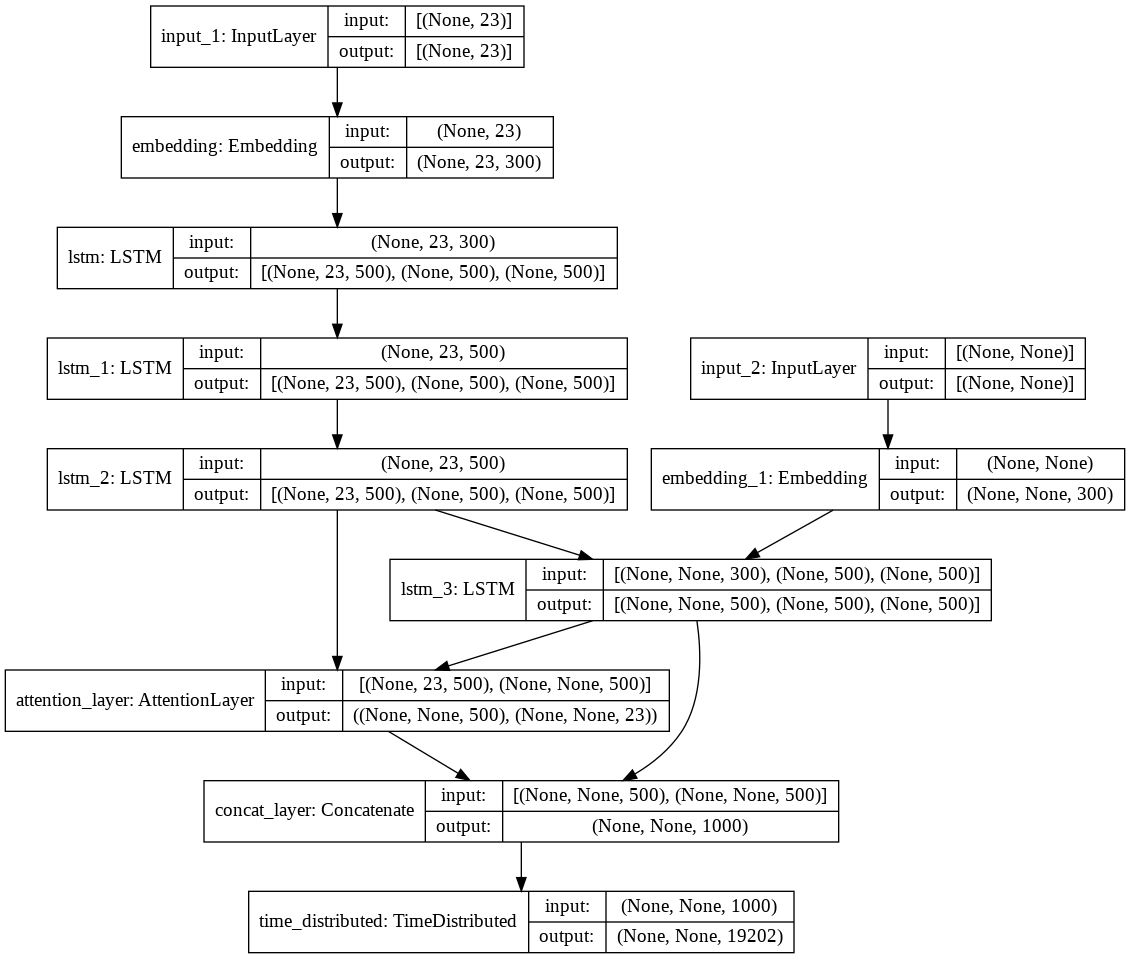

In [26]:
from tensorflow.keras.models import Model,load_model, model_from_json
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='train_model.png', show_shapes=True)

In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/model.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [28]:
#K.set_value(model.optimizer.learning_rate, 0.0005)

In [29]:
history=model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=20,callbacks=[es,model_checkpoint_callback],batch_size=512, validation_data=([X_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/20
297/297 [==============================] - 540s 2s/step - loss: 1.2333 - accuracy: 0.8752 - val_loss: 0.6716 - val_accuracy: 0.9081
Epoch 2/20
297/297 [==============================] - 502s 2s/step - loss: 0.6177 - accuracy: 0.9125 - val_loss: 0.5066 - val_accuracy: 0.9237
Epoch 3/20
297/297 [==============================] - 498s 2s/step - loss: 0.4742 - accuracy: 0.9262 - val_loss: 0.4309 - val_accuracy: 0.9323
Epoch 4/20
297/297 [==============================] - 494s 2s/step - loss: 0.3977 - accuracy: 0.9345 - val_loss: 0.3910 - val_accuracy: 0.9368
Epoch 5/20
297/297 [==============================] - 490s 2s/step - loss: 0.3486 - accuracy: 0.9399 - val_loss: 0.3676 - val_accuracy: 0.9398
Epoch 6/20
297/297 [==============================] - 490s 2s/step - loss: 0.3160 - accuracy: 0.9439 - val_loss: 0.3500 - val_accuracy: 0.9422
Epoch 7/20
297/297 [==============================] - 486s 2s/step - loss: 0.2899 - accuracy: 0.9469 - val_loss: 0.3379 - val_accuracy: 0.9436

In [38]:
model.save('/content/drive/MyDrive/Colab Notebooks/mlt.h5')

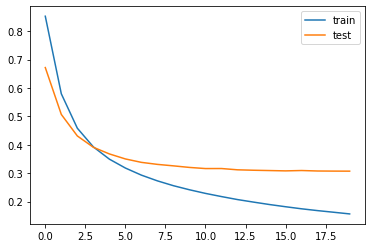

In [39]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [40]:
encoder_model = Model(inputs=encoder_input, outputs=[encoder_output, a_enc, c_enc])


decoder_initial_state_a = Input(shape=(latent_dim,))
decoder_initial_state_c = Input(shape=(latent_dim,))
decoder_hidden_state = Input(shape=(max_eng, latent_dim))

decoder_out, decoder_a, decoder_c = decoder_lstm(decoder_emb, initial_state=[decoder_initial_state_a, decoder_initial_state_c])
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state, decoder_out])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_out, attn_out_inf])

decoder_final = decoder_dense(decoder_inf_concat)
decoder_model = Model([decoder_input]+[decoder_hidden_state, decoder_initial_state_a, decoder_initial_state_c], [decoder_final]+[decoder_a, decoder_c])

In [41]:
def decoded_sequence(input_seq):
    encoder_out, encoder_a, encoder_c = encoder_model.predict(input_seq) #Collecting output from encoder inference model.
    
    next_input = np.zeros((1,1))
    next_input[0,0] = french_tokenizer.word_index['start']
    output_seq = ''
    
    stop = False
    while not stop:
        decoded_out, trans_state_a, trans_state_c = decoder_model.predict([next_input] + [encoder_out, encoder_a, encoder_c])
        
        output_idx = np.argmax(decoded_out[0, -1, :])
    
        if output_idx == french_tokenizer.word_index['end']: 
            stop = True
        elif output_idx>0 and output_idx != french_tokenizer.word_index['start'] :
            output_token = french_tokenizer.index_word[output_idx] 
            output_seq = output_seq + ' ' + output_token 
        
        
        next_input[0,0] = output_idx
       
        encoder_a, encoder_c = trans_state_a, trans_state_c
        
    return output_seq        

In [42]:
Eindex2word = english_tokenizer.index_word
Mindex2word = french_tokenizer.index_word

In [43]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=Fword2index['start']) and i!=Fword2index['end']):
        newString=newString+Mindex2word[i]+' '
    return newString
def seq2text(input_seq):
  newString=''
  for i in input_seq:
    if(i!=0):
      newString=newString+Eindex2word[i]+' '
  return newString

In [44]:

for i in range(15):
  print("Review:",seq2text(X_test[i]))
  print("Original summary:",seq2summary(y_test[i]))
  print("Predicted summary:",decoded_sequence(X_test[i].reshape(1,23)))
  print("\n")

Review: hope boring 
Original summary: esp ennuie 
Predicted summary:  esp trop ennuyeux


Review: allowed 
Original summary: cela permis 
Predicted summary:  autoris


Review: look fabulous 
Original summary: air resplendissante 
Predicted summary:  air resplendissant


Review: deals furniture 
Original summary: fait commerce meubles 
Predicted summary:  propri taire


Review: book 
Original summary: livre 
Predicted summary:  livre


Review: think funny 
Original summary: pense marrante 
Predicted summary:  pense amusant


Review: suit anything cheap 
Original summary: costume tout sauf bon march 
Predicted summary:  cette quelque chose auquel bon march


Review: ran ahead warn everybody 
Original summary: courus devant avertir tout monde 
Predicted summary:  couru devant avertir tout monde


Review: find get best flavor OOV fresh OOV 
Original summary: trouve obtiens meilleure saveur moulant grains poivre frais 
Predicted summary:  trouv meilleur meilleur moyen agir glac


Review: r